# Dự đoán giá cổ phiếu SOL

## Step 1: Thêm thư viện cần thiết

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Step 2: Thêm vào bộ dữ liệu đã thu thập được

In [82]:
data = pd.read_csv('''D:\Python\Predict_Price_Token\stokeData.csv''')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\htien\AppData\Local\Temp\ipykernel_17576\2479675713.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('''D:\Python\Predict_Price_Token\stokeData.csv''')


### Xử lý dữ liệu 

In [83]:
# Phân chia cột Open time thành Năm, Tháng, Ngày, Giờ, Phút
def split_time(i):
    date_time = datetime.fromtimestamp(i / 1000).strftime('%Y-%m-%d ; %H : %M')
    date_time = date_time.split(';')

    date = date_time[0].strip().split('-')

    year = date[0]
    month = date[1]
    day = date[2]

    time = date_time[1].strip().split(':')
    hour = time[0]
    minute = time[1]
    return pd.Series([year,month,day,hour,minute])

data[['Year','Month','Day','Hour','Minute']] = data['Open Time'].apply(split_time).astype(int)

# Loại bỏ các cột không cần thiết
data = data.drop(['Ignor','Close Time','Open Time'], axis = 1)

### Tạo 2 cột mới thể hiện sự tăng giảm trong 1 khoản thời gian

In [108]:
data['Open-Close']  = data['Open'] - data['Close']
data['Low-High']  = data['Low'] - data['High']
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

In [109]:
data.head()


,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Year,Month,Day,Hour,Minute,Open-Close,Low-High,Target
0,153.58,153.67,153.53,153.67,1219.291,187269.38964,763,434.796,66790.96622,2024,8,11,0,0,-0.09,-0.14,0
1,153.67,153.70,153.57,153.65,368.225,56572.24527,397,190.450,29257.92207,2024,8,11,0,1,0.02,-0.13,0
2,153.66,153.66,153.46,153.46,980.953,150632.77617,551,34.534,5303.32727,2024,8,11,0,2,0.20,-0.20,0
3,153.46,153.46,153.34,153.43,401.471,61578.82730,457,217.387,33341.68891,2024,8,11,0,3,0.03,-0.12,1
4,153.44,153.53,153.39,153.44,502.188,77053.39769,440,354.352,54368.03312,2024,8,11,0,4,0.00,-0.14,0


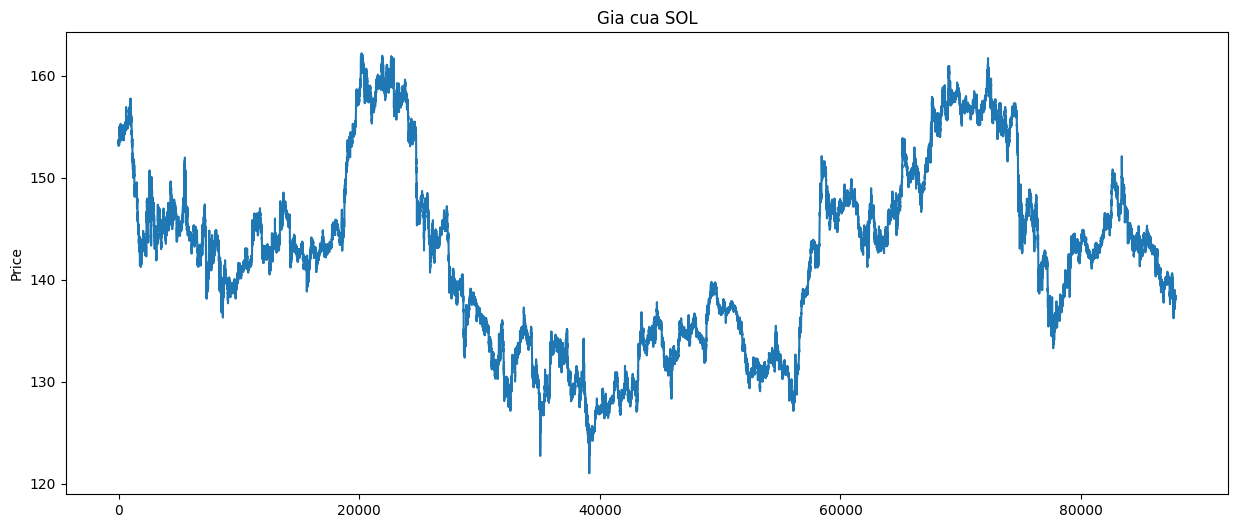

In [86]:
plt.figure(figsize=(15,6))
plt.plot(data['Close'])
plt.title("Gia cua SOL")
plt.ylabel("Price")
plt.show()

C:\Users\htien\AppData\Local\Temp\ipykernel_17576\4108908691.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\htien\AppData\Local\Temp\ipykernel_17576\4108908691.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\htien\AppData\Local\Temp\ipykernel_1757

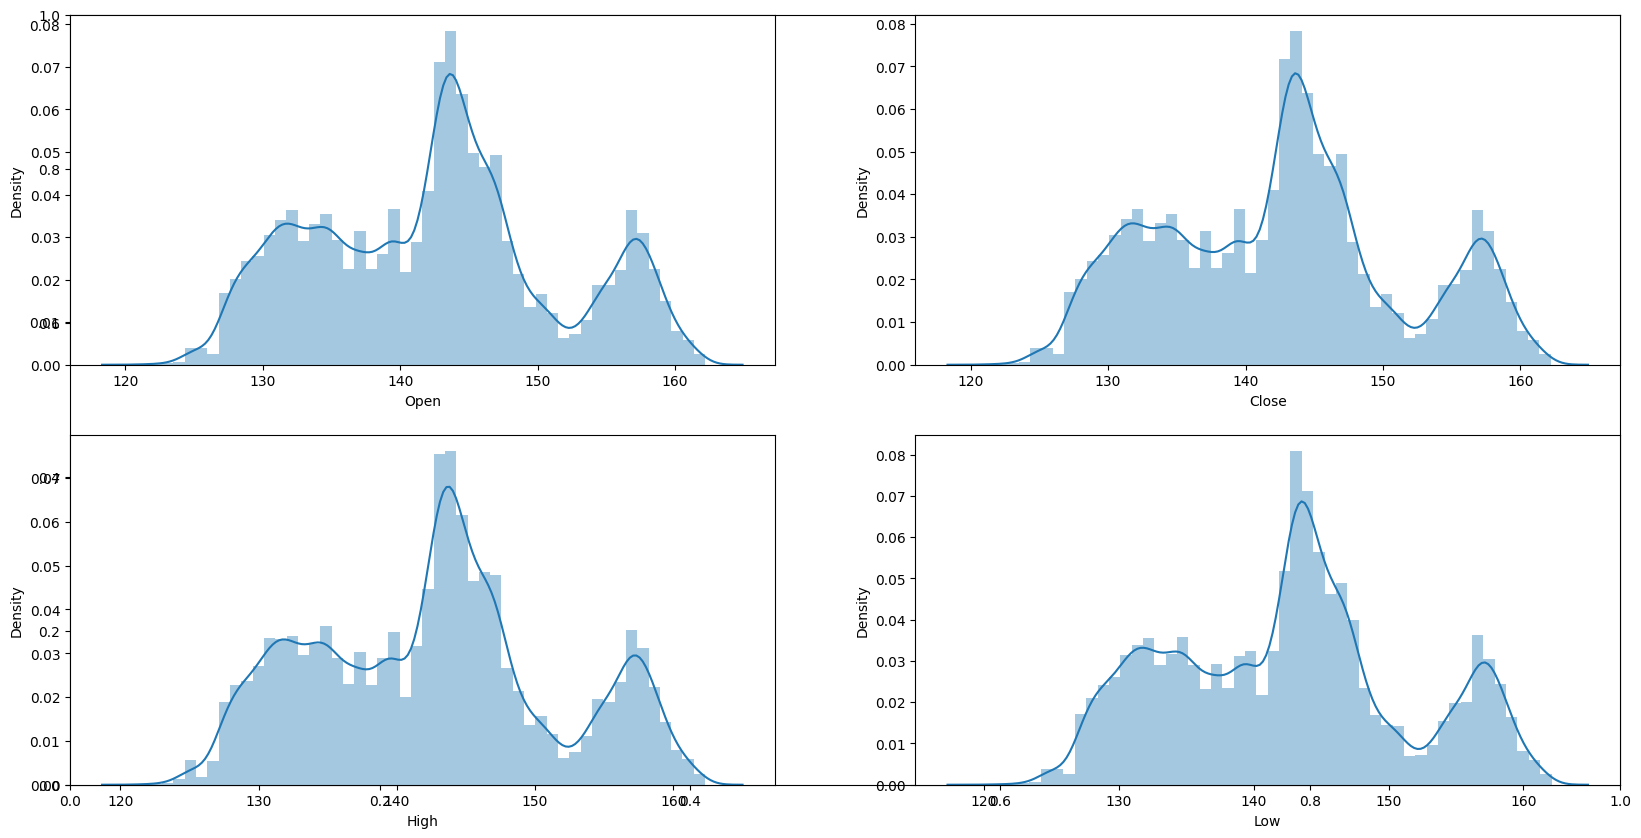

In [87]:
features = ['Open','Close','High','Low']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(data[col])
plt.show()

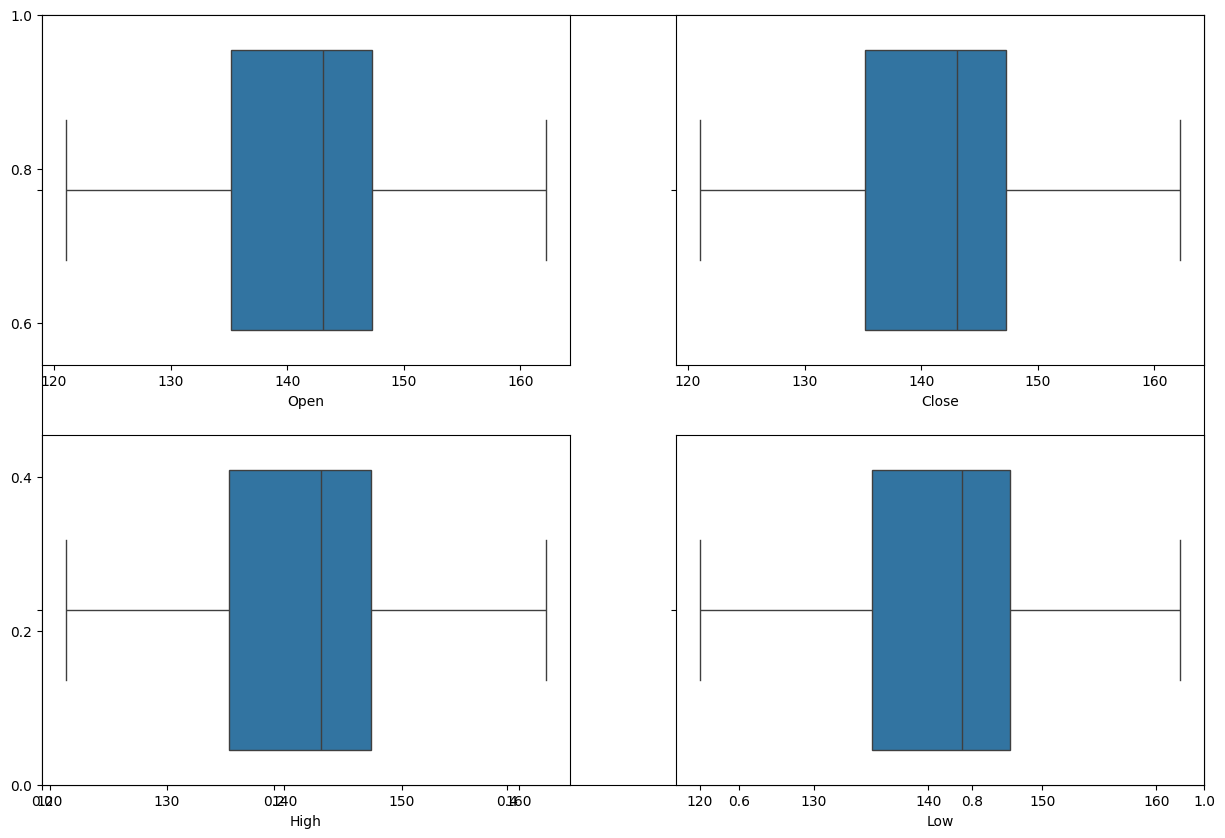

In [88]:
plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(data[col], orient='h')
plt.show()

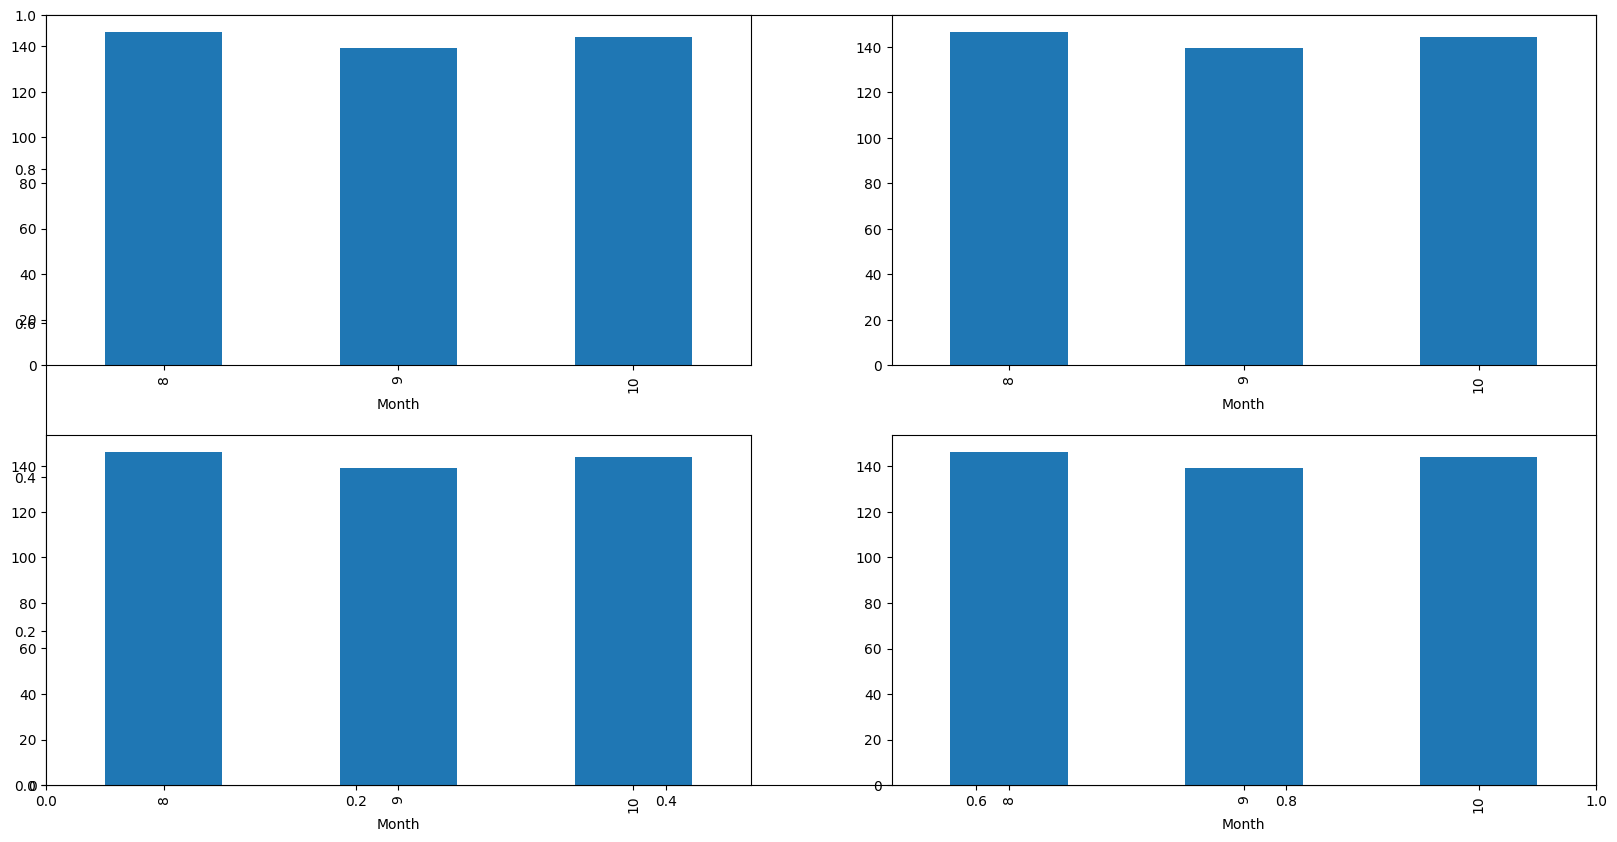

In [89]:
data_grouped = data.groupby('Month').mean()
plt.subplots(figsize = (20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [90]:
data.head()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Year,Month,Day,Hour,Minute,Open-Close,Low-High
0,153.58,153.67,153.53,153.67,1219.291,187269.38964,763,434.796,66790.96622,2024,8,11,0,0,-0.09,-0.14
1,153.67,153.70,153.57,153.65,368.225,56572.24527,397,190.450,29257.92207,2024,8,11,0,1,0.02,-0.13
2,153.66,153.66,153.46,153.46,980.953,150632.77617,551,34.534,5303.32727,2024,8,11,0,2,0.20,-0.20
3,153.46,153.46,153.34,153.43,401.471,61578.82730,457,217.387,33341.68891,2024,8,11,0,3,0.03,-0.12
4,153.44,153.53,153.39,153.44,502.188,77053.39769,440,354.352,54368.03312,2024,8,11,0,4,0.00,-0.14


In [107]:
data_shape =data.shape 
# Lấy 100 dòng đầu tiên làm bộ dữ liệu test
data_test = data.head(100)
# Bộ dữ liệu còn lại dùng để training
data_train = data.iloc[100:]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
x_train, x_test, y_train, y_test = train_test_split(x = data_train, y = data_test, test_size= 0.1, random_state = 40)

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [93]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [95]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()